## 1. Calculation

[[1 2 2 1 0 3 7 3]
 [3 0 7 4 0 2 2 4]
 [3 4 3 7 2 6 6 7]
 [2 6 6 2 2 7 4 6]
 [5 4 7 4 4 4 5 3]
 [5 1 7 4 3 3 5 7]
 [0 4 2 2 7 7 0 3]
 [4 2 1 2 6 4 4 6]]


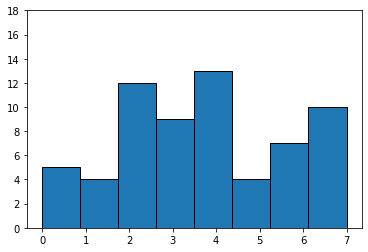

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123456)
img = np.random.randint(0,8,size=(8,8))
print(img)
intensity, count = np.unique(img, return_counts=True)
ys, xs, patches = plt.hist(intensity, bins=len(intensity), weights=count, edgecolor='black')
plt.xticks(np.arange(8))
plt.yticks(np.arange(20,step=2))
plt.show()

## 2. histogram equalization

h(i) = (Gmax / Nt) * H(i)  
h(i): 정규화합 히스토그램  
Gmax: 영상의 최대 밝기값  
Nt: 픽셀 수  
H(i): 누적합 히스토그램

In [2]:
import pandas as pd

Gmax = intensity.max()
Nt = img.shape[0] * img.shape[1]
H, xs, patches = plt.hist(intensity, bins=len(intensity), weights=count, edgecolor='black', cumulative='True')
plt.close()
n_sum = H * (Gmax/Nt)
rd = np.round(n_sum)

data = []
data.append(intensity)
data.append(H)
data.append(n_sum)
data.append(rd)

df = pd.DataFrame(np.array(data).T, columns=['밝기','누적합','정규화합','반올림값'], index=None)
df

,밝기,누적합,정규화합,반올림값
0,0.0,5.0,0.546875,1.0
1,1.0,9.0,0.984375,1.0
2,2.0,21.0,2.296875,2.0
3,3.0,30.0,3.281250,3.0
4,4.0,43.0,4.703125,5.0
5,5.0,47.0,5.140625,5.0
6,6.0,54.0,5.906250,6.0
7,7.0,64.0,7.000000,7.0


[[1 2 2 1 0 3 7 3]
 [3 0 7 4 0 2 2 4]
 [3 4 3 7 2 6 6 7]
 [2 6 6 2 2 7 4 6]
 [5 4 7 4 4 4 5 3]
 [5 1 7 4 3 3 5 7]
 [0 4 2 2 7 7 0 3]
 [4 2 1 2 6 4 4 6]]

[[1 2 2 1 1 3 7 3]
 [3 1 7 5 1 2 2 5]
 [3 5 3 7 2 6 6 7]
 [2 6 6 2 2 7 5 6]
 [5 5 7 5 5 5 5 3]
 [5 1 7 5 3 3 5 7]
 [1 5 2 2 7 7 1 3]
 [5 2 1 2 6 5 5 6]]


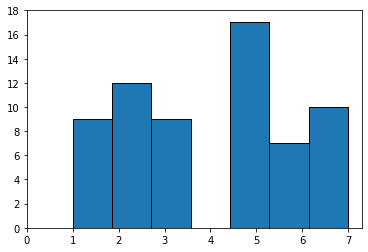

In [3]:
print(img)
dic = {}
for i in range(len(intensity)):
    dic[i] = np.where(img==i) #행과열
#print(dic)
print()
for x in range(len(intensity)):
    if intensity[x] != rd[x]:
        for y in range(len(dic[x][0])):
            img[dic[x][0][y],dic[x][1][y]] = rd[x]
            
print(img)

index, count = np.unique(img, return_counts=True)
ys, xs, patches = plt.hist(index, bins=len(intensity)-1, weights=count, edgecolor='black')
plt.xticks(np.arange(8))
plt.yticks(np.arange(20,step=2))
plt.show()